In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import seaborn as sns

In [3]:
iris=datasets.load_iris()

In [10]:
df=pd.DataFrame(iris.data,columns=iris.feature_names)

In [11]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [12]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [13]:
x_scaled=scaler.fit_transform(df)

In [14]:
from sklearn.decomposition import PCA

In [15]:
pca=PCA(n_components=2)

In [16]:
pca_scaled=pca.fit_transform(x_scaled)

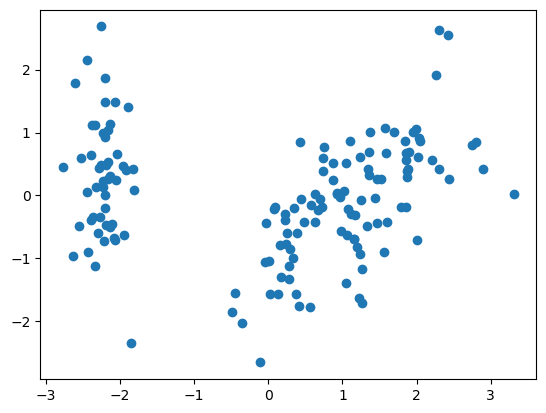

In [18]:
plt.scatter(pca_scaled[:,0],pca_scaled[:,1])

Text(0.5, 1.0, 'Dendogram')

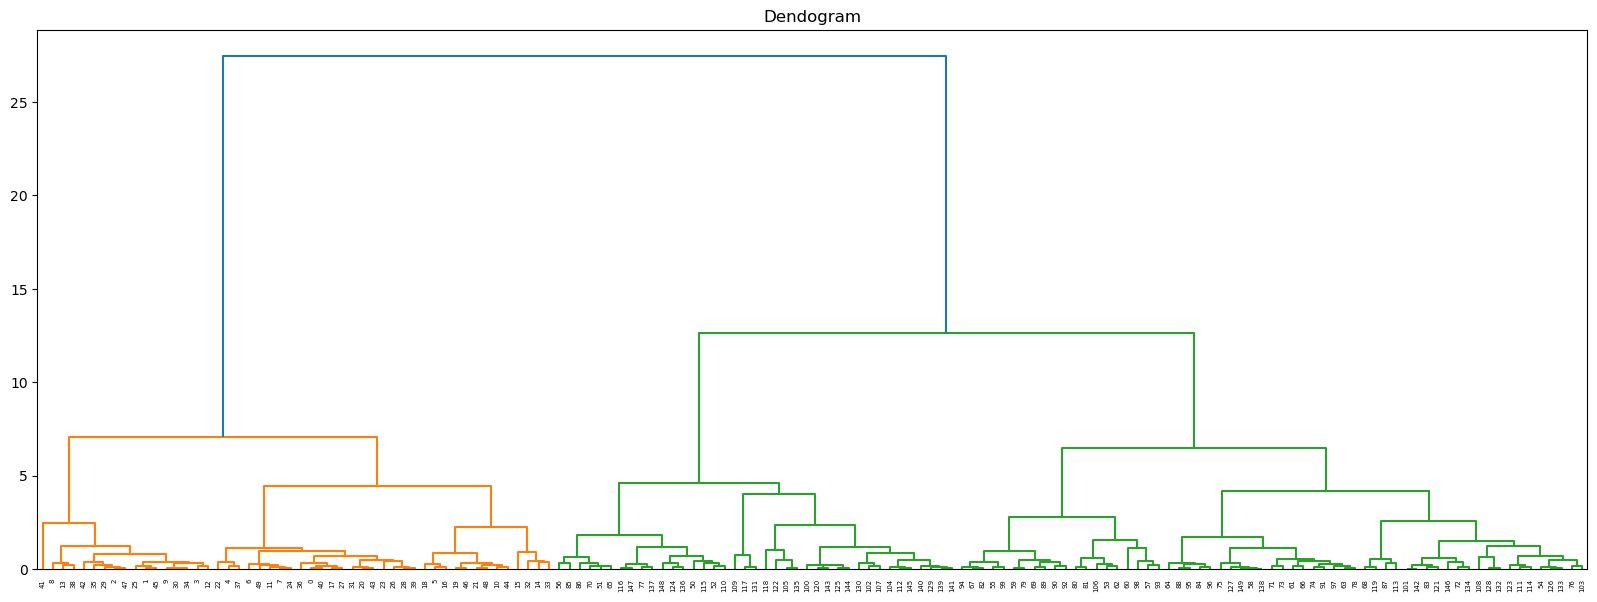

In [23]:
import scipy.cluster.hierarchy as sc
plt.figure(figsize=(20,7))
plt.title('Dendograms')
sc.dendrogram(sc.linkage(pca_scaled,method='ward'))
plt.title('Dendogram')

In [25]:
from sklearn.cluster import AgglomerativeClustering
cluster=AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='ward')
cluster.fit(pca_scaled)

AgglomerativeClustering()

In [26]:
cluster.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

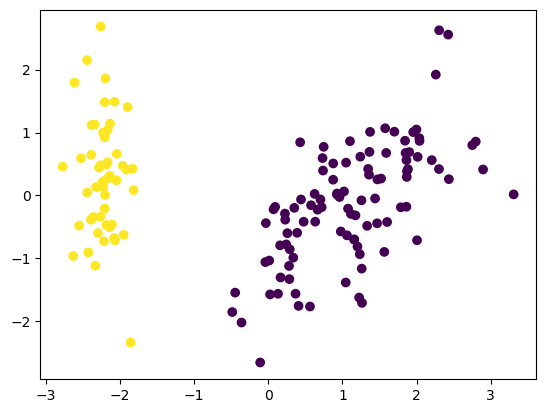

In [27]:
plt.scatter(pca_scaled[:,0],pca_scaled[:,1],c=cluster.labels_)

In [28]:
from sklearn.metrics import silhouette_score

In [29]:
silhouette_coefficients=[]

for k in range(2,11):
    agglo=AgglomerativeClustering(n_clusters=k,affinity='euclidean',linkage='ward')
    agglo.fit(x_scaled)
    score=silhouette_score(x_scaled,agglo.labels_)
    silhouette_coefficients.append(score)

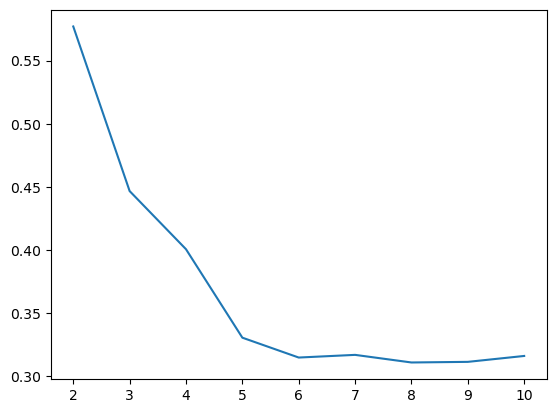

<Figure size 1000x2000 with 0 Axes>

In [37]:
plt.plot(range(2,11),silhouette_coefficients)
plt.xticks(range(2,11))
plt.figure(figsize=(10,20))
plt.show()

In [68]:
agglo=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')
agglo.fit(x_scaled)

AgglomerativeClustering(n_clusters=3)

In [69]:
score = silhouette_score(x_scaled, agglo.labels_)

In [70]:
score

0.4466890410285909